Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf

Loading Data

In [ ]:
df=pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X=df.iloc[:,0:-1]
X = SS.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
Y=df["Outcome"].values
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
import pathlib
ES = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

Modelling

In [ ]:
# step1 :- initialize the Model
ann = Sequential()

# step2 :- Add Layers into model
ann.add( Dense(units = 10, activation = "relu") )
ann.add( Dense(units = 10, activation = "relu") )
ann.add( Dense(units = 1, activation = "sigmoid") )

# step3 :- Establihing connection 
ann.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=["accuracy"])

# step4 :- Fit the model
ann.fit(X_train, Y_train, batch_size = 25, epochs = 800,validation_data=(X_test,Y_test),callbacks=ES)


Epoch 1/800
25/25 [==============================] - 1s 13ms/step - loss: 0.6390 - accuracy: 0.6678 - val_loss: 0.6476 - val_accuracy: 0.6753
Epoch 2/800
25/25 [==============================] - 0s 3ms/step - loss: 0.5928 - accuracy: 0.6906 - val_loss: 0.6052 - val_accuracy: 0.6948
Epoch 3/800
25/25 [==============================] - 0s 4ms/step - loss: 0.5647 - accuracy: 0.7052 - val_loss: 0.5749 - val_accuracy: 0.6948
Epoch 4/800
25/25 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.7215 - val_loss: 0.5531 - val_accuracy: 0.7013
Epoch 5/800
25/25 [==============================] - 0s 4ms/step - loss: 0.5292 - accuracy: 0.7378 - val_loss: 0.5365 - val_accuracy: 0.7078
Epoch 6/800
25/25 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.7459 - val_loss: 0.5258 - val_accuracy: 0.7143
Epoch 7/800
25/25 [==============================] - 0s 4ms/step - loss: 0.5095 - accuracy: 0.7557 - val_loss: 0.5148 - val_accuracy: 0.7338
Epoch 8/800


Visualizing the loss

<AxesSubplot:>

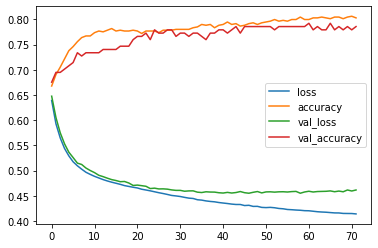

In [ ]:
df_loss = pd.DataFrame(ann.history.history)
df_loss.plot()

In [ ]:
# step5 :- Predict the model
Y_pred = ann.predict(X_test)
print(Y_pred)

5/5 [==============================] - 0s 2ms/step
[[0.44791394]
 [0.33336285]
 [0.05675611]
 [0.09849434]
 [0.43723553]
 [0.03322027]
 [0.59051615]
 [0.18432082]
 [0.08313704]
 [0.09185836]
 [0.34691617]
 [0.03107084]
 [0.24330495]
 [0.44879937]
 [0.7619486 ]
 [0.889505  ]
 [0.37091732]
 [0.3476711 ]
 [0.43844026]
 [0.63843226]
 [0.7037314 ]
 [0.7843759 ]
 [0.4695239 ]
 [0.8041411 ]
 [0.09721679]
 [0.15521257]
 [0.14016543]
 [0.07249966]
 [0.0025458 ]
 [0.17566541]
 [0.65436816]
 [0.2529949 ]
 [0.95721036]
 [0.31916124]
 [0.11767697]
 [0.9898374 ]
 [0.58391845]
 [0.09375665]
 [0.02257607]
 [0.8933801 ]
 [0.20339385]
 [0.19122636]
 [0.12013125]
 [0.13790558]
 [0.5760366 ]
 [0.1313626 ]
 [0.02665937]
 [0.8306785 ]
 [0.30190012]
 [0.02339083]
 [0.3362081 ]
 [0.1636068 ]
 [0.20417097]
 [0.1428239 ]
 [0.2386839 ]
 [0.3040196 ]
 [0.20355996]
 [0.10634326]
 [0.29519227]
 [0.15634264]
 [0.90338373]
 [0.14013016]
 [0.23316717]
 [0.94334793]
 [0.19662482]
 [0.03184367]
 [0.21414195]
 [0.6733451

In [ ]:
Y_pred = np.where(Y_pred>0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
# evaluation
from sklearn.metrics import classification_report
print( classification_report(Y_test,Y_pred) )

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       111
           1       0.64      0.53      0.58        43

    accuracy                           0.79       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154

